In [1]:
!pip install deap
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import random
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 7.4 MB/s 


In [11]:
CLUSTERS = 4
DIMENSIONS = 2
POPULATION_SIZE = 500
MAX_GENERATIONS = 500

MIN_START_POSITION, MAX_START_POSITION = -5.12, 5.12
MIN_SPEED, MAX_SPEED = -3, 3
MAX_LOCAL_UPDATE_FACTOR = MAX_GLOBAL_UPDATE_FACTOR = 2.0

In [3]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Particle', np.ndarray, fitness=creator.FitnessMin, speed=None, best=None)

def randomFloat(low, up):
  return [random.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

def createParticle():
  particle = creator.Particle(randomFloat(MIN_START_POSITION, MAX_START_POSITION))
  particle.speed = np.random.uniform(MIN_SPEED, MAX_SPEED, DIMENSIONS)
  return particle

toolbox = base.Toolbox()
toolbox.register('particleCreator', createParticle)
toolbox.register('populationCreator', tools.initRepeat, list, toolbox.particleCreator)

def updateParticle(particle, best):
  localUpdateFactor = np.random.uniform(0, MAX_LOCAL_UPDATE_FACTOR, particle.size)
  globalUpdateFactor = np.random.uniform(0, MAX_GLOBAL_UPDATE_FACTOR, particle.size)

  localSpeedUpdate = localUpdateFactor * (particle.best - particle)
  globalSpeedUpdate = globalUpdateFactor * (best - particle)

  particle.speed = particle.speed + (localSpeedUpdate + globalSpeedUpdate)
  particle.speed = np.clip(particle.speed, MIN_SPEED, MAX_SPEED)
  particle[:] = particle + particle.speed


toolbox.register('update', updateParticle)

def rastrigins(particle):
  f = 10.0 * DIMENSIONS + sum([xi*xi - 10.0 * np.cos(2.0*np.pi*xi) for xi in particle])
  return f,


toolbox.register('evaluate', rastrigins)

In [18]:
def RA(n=POPULATION_SIZE, gens=MAX_GENERATIONS, verbose=False):
  population = toolbox.populationCreator(n)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register('min', np.min)
  stats.register('avg', np.mean)
  logbook = tools.Logbook()
  logbook.header = ['gen', 'evals'] + stats.fields
  gen_count = 0
  best = [None for _ in range(CLUSTERS)]

  while gen_count < gens:
    cluster = 0
    for particle in population:
      particle.fitness.values = toolbox.evaluate(particle)
      if (particle.best is None or particle.best.size == 0 or particle.best.fitness < particle.fitness):
        particle.best = creator.Particle(particle)
        particle.best.fitness.values = particle.fitness.values
        if best[cluster] is None or best[cluster].size == 0 or best[cluster].fitness < particle.fitness:
          best[cluster] = creator.Particle(particle)
          best[cluster].fitness.values = particle.fitness.values
      cluster = (cluster + 1) % CLUSTERS

    cluster = 0
    for particle in population:
      toolbox.update(particle, best[cluster])
      cluster = (cluster + 1) % CLUSTERS
    
    gen_count += 1

    logbook.record(gen=gen_count, evals=len(population), **stats.compile(population))
    if verbose == True:
      print(logbook.stream)


  bestCluster = best[0]
  for cluster in best:
    if (cluster.fitness.values[0] < bestCluster.fitness.values[0]):
      bestCluster = cluster
  if verbose == True:
    print(best)
    print('--- Лучшая частица = ', bestCluster)
    print('--- Лучшая приспособленность = ', bestCluster.fitness.values[0])
  
  return bestCluster, logbook

In [22]:
RA(verbose=True)

gen	evals	min    	avg    
1  	500  	1.38712	36.7808
2  	500  	1.27885	28.3779
3  	500  	1.48564	27.2438
4  	500  	2.06011	27.8963
5  	500  	0.232897	28.0723
6  	500  	1.91813 	27.1212
7  	500  	1.01761 	26.6092
8  	500  	2.20404 	27.1112
9  	500  	0.781631	26.2572
10 	500  	1.68148 	26.3193
11 	500  	0.0726536	25.4515
12 	500  	0.289383 	26.511 
13 	500  	0.0927145	26.0232
14 	500  	0.275423 	24.9393
15 	500  	0.0126023	25.188 
16 	500  	0.338271 	25.518 
17 	500  	0.700846 	25.2614
18 	500  	0.223999 	25.413 
19 	500  	0.703725 	26.1296
20 	500  	0.124271 	26.4151
21 	500  	0.327747 	26.6923
22 	500  	0.322558 	26.2521
23 	500  	0.878767 	26.2153
24 	500  	0.78233  	26.279 
25 	500  	1.01906  	24.9853
26 	500  	0.0687683	25.1062
27 	500  	0.473166 	26.0597
28 	500  	0.70019  	25.4718
29 	500  	2.22795  	25.6208
30 	500  	0.0191263	24.9303
31 	500  	1.16037  	25.213 
32 	500  	0.881182 	25.0124
33 	500  	0.987971 	24.9925
34 	500  	0.0961547	25.1697
35 	500  	1.3333   	25.3426
36 	500 

(Particle([-0.00658344, -0.00449313]),
 [{'gen': 1, 'evals': 500, 'min': 1.387116619441887, 'avg': 36.78080762734101},
  {'gen': 2,
   'evals': 500,
   'min': 1.278846049010717,
   'avg': 28.377884237792795},
  {'gen': 3,
   'evals': 500,
   'min': 1.4856356336367043,
   'avg': 27.24379399158781},
  {'gen': 4,
   'evals': 500,
   'min': 2.060107709627111,
   'avg': 27.896345084686946},
  {'gen': 5,
   'evals': 500,
   'min': 0.2328967223123115,
   'avg': 28.072275387773196},
  {'gen': 6,
   'evals': 500,
   'min': 1.918133916338121,
   'avg': 27.121214734595437},
  {'gen': 7,
   'evals': 500,
   'min': 1.0176126885639576,
   'avg': 26.609183751756202},
  {'gen': 8,
   'evals': 500,
   'min': 2.2040418114761877,
   'avg': 27.111235584224108},
  {'gen': 9,
   'evals': 500,
   'min': 0.7816309815169653,
   'avg': 26.25716797521873},
  {'gen': 10,
   'evals': 500,
   'min': 1.681481346924084,
   'avg': 26.319304590311596},
  {'gen': 11,
   'evals': 500,
   'min': 0.07265355142313723,
   'a

100 0.0016327829961113594
200 0.004750283180744219
300 0.003208643341153561
400 0.0012620901418429753
500 0.0009003308036596991
600 0.0013889409749268111
700 0.0015666710946433682
800 9.796191676514354e-05
900 0.0028780852397467527


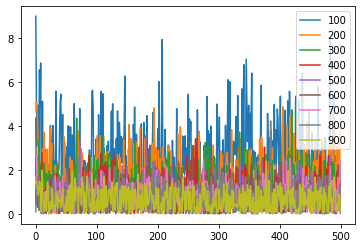

In [21]:
for n in range(100, 1000, 100):
  best, logbook = RA(n=n)
  min = logbook.select("min")
  print(n, best.fitness.values[0])
  plt.plot(min, label=n)

plt.legend()
plt.show()